In [83]:
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import hatch
from matplotlib.path import Path

import numpy as np

import importlib

The hatch object simply defines 

1. `num_vertices`, so that the final hatch path function `hatch.get_path` can know how long the total vertices array for the path should be.
2. `set_vertices_and_codes`, which fills in numpy arrays it is passed with the relevant vertices

In [122]:
h = hatch.SouthEastHatch('X', density=6)
h.num_vertices

14

In [123]:
vertices = np.empty((h.num_vertices, 2))
codes = np.empty(h.num_vertices, Path.code_type)
h.set_vertices_and_codes(vertices, codes)
codes

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2], dtype=uint8)

Once the "unit" has been constructed, it can be tiled arbitrarily to fill an area, then a clipping path applied to restrict it to the area of interest.

Notice that for the "line" hatches (horizontal, vertical, southeast, and  northeast), Many of the lines are overlap (i.e. they are drawn twice in the figure below) for each repetition. However, since only the bit inside the unit square is actually repeated, this does not cause double-drawing of any lines in the actual output of the backend.

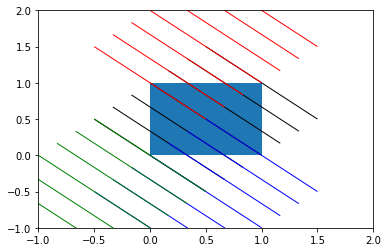

In [129]:
fig, ax = plt.subplots()
ax.add_patch(patches.PathPatch(
    Path(vertices, codes)
))

# extend the limits so we can see what it looks like to manually 
# place a couple of repetitions
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])

ax.add_patch(patches.PathPatch(
    Path(vertices + np.array([0, 1]), codes), color='r'
))
ax.add_patch(patches.PathPatch(
    Path(vertices + np.array([0, -1]), codes), color='b'
))
ax.add_patch(patches.PathPatch(
    Path(vertices + np.array([-1, -1]), codes), color='g'
))

# the black hatch should fill this unit square
ax.add_patch(patches.Rectangle([0, 0], 1, 1, zorder=-100))

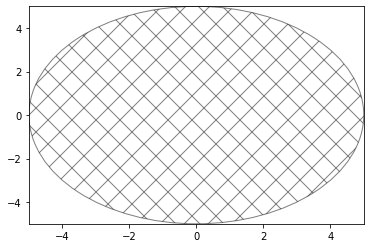

In [133]:
fig, ax = plt.subplots()
# ax.set_axis_off()
ax.add_patch(patches.Circle([0., 0.], fill=False, hatch='X', color=(0, 0, 0, 0.5)))
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.savefig('/home/bbeltr1/Downloads/test.svg')

The calling tree is:

1. the backend calls gc.get_hatch_path to get the patch to be tiled
2. gc.get_hatch_path calls Path.hatch(self.get_hatch()) (with the hatch pattern string it is storing internally)
    a. gc gets its `_hatch` value in `patches.draw` 
    b. which delegates to the `_bind_draw_path_function` context manager
3. Path.hatch is just a thin wrapper around `mpl.hatch.get_path`.

Note that while at all these steps, the density is set to a default (`density=6`), it's not clear that this default is changable by any user-facing API (since the user can only pass in the hatch *pattern* to a `Patch`.

This means that for "shape" hatches (also, why can you not hatch an arbitrary marker?), you can quickly run into a "minimum density" issue, since, as can be seen below, the hatch density is always expressed in display space.

(-10.0, 10.0)

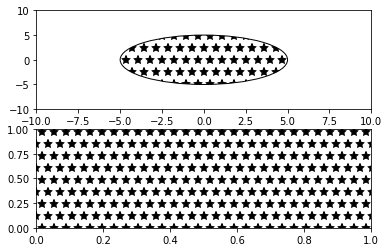

In [114]:
fig, ax = plt.subplots(2, 1)
for axi in ax:
    axi.add_patch(patches.Circle([0., 0.], fill=False, hatch='*'))
ax[0].set_xlim([-10, 10])
ax[0].set_ylim([-10, 10])

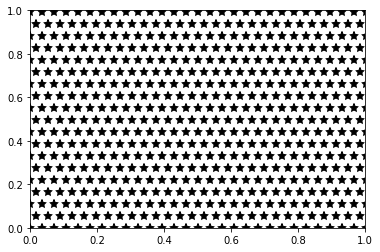

In [115]:
fig, ax = plt.subplots()
ax.add_patch(patches.Circle([0., 0.], fill=False, hatch='*'))
fig.

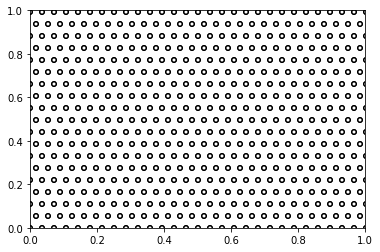

In [69]:
fig, ax = plt.subplots()
ax.add_patch(patches.Circle([0.5, 0.5], fill=False, hatch='o'))

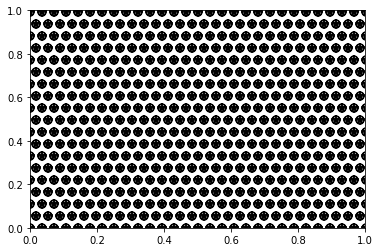

In [72]:
fig, ax = plt.subplots()
ax.add_patch(patches.Circle([0.5, 0.5], fill=False, hatch='O*'))